# Support Vector Machines


A support vector machine is a classification model that applies a kernel function to the input and then seperates the transformed features by a hyperplane. 

### Maximal Margin Classifier

Suppose we have two classes presented by a graph below:

In [3]:
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

In [33]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:100, [0,3]]
y = iris.target[:100]

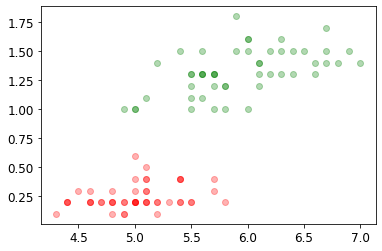

In [34]:
plt.scatter(X[:50,0],X[:50,1],color="r",alpha=0.3)
plt.scatter(X[50:100,0],X[50:100,1],color="g",alpha=0.3)
plt.show()

To find the maximal margin classifier we need to find the coefficients of the linear line that maximises the separation between the extremities of the two classes. This is usually done by "trial and error" methods like cross validation or gradient descent so below it is implemented using LinearSVC:

In [100]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=100)
model.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
model.coef_

array([[0.        , 5.00001907]])

In [102]:
#here we generate the data
x1_new = np.linspace(4,8,100) 
x2_new = np.linspace(0,2,100)

x1_new_mesh,x2_new_mesh = np.meshgrid(x1_new,x2_new)

x1_flat = x1_new_mesh.flatten()
x2_flat = x2_new_mesh.flatten()

X_new = np.vstack((x1_flat, x2_flat))

output = model.predict(X_new.T)
colors = ['mistyrose' if x==0 else 'azure' for x in output]

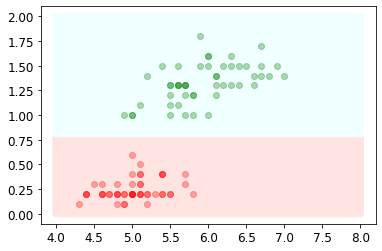

In [103]:
plt.scatter(x1_flat,x2_flat,c=colors)

plt.scatter(X[:50,0],X[:50,1],color="r",alpha=0.3)
plt.scatter(X[50:100,0],X[50:100,1],color="g",alpha=0.3)
plt.show()

## Non separable case

The technique above only works if the data is linearly seperable. If it isn't linearly seperable a kernel(non-linear function) can be applied first and then the model is fit afterwards. We can demonstrate on a very simple one dimensional data set: 

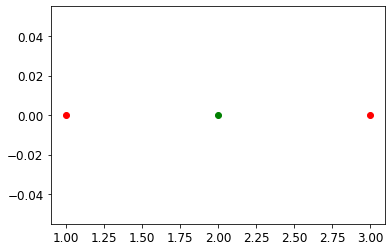

In [109]:
plt.scatter(np.array([[3],[1]]),np.array([[0],[0]]),color="r")
plt.scatter(np.array([2]),np.array([[0]]),color="g")
plt.show()

This data can't be fitted with a line but if we square the input first we get: 

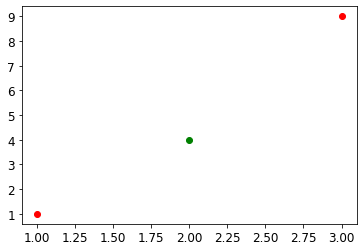

In [110]:
plt.scatter(np.array([[3],[1]]),np.array([[9],[1]]),color="r")
plt.scatter(np.array([2]),np.array([[4]]),color="g")
plt.show()

Which we can fit a model through:

In [131]:
X = np.array([[1,1],[2,4],[3,9]])
y = np.array([[0],[1],[0]])

model2 = SVC(kernel="linear", C=100)
model2.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
#here we generate the data
x1_new = np.linspace(1,3,100) 
x2_new = np.linspace(1,9,100)

x1_new_mesh,x2_new_mesh = np.meshgrid(x1_new,x2_new)

x1_flat = x1_new_mesh.flatten()
x2_flat = x2_new_mesh.flatten()

X_new = np.vstack((x1_flat, x2_flat))

output = model2.predict(X_new.T)
colors = ['mistyrose' if x==0 else 'azure' for x in output]

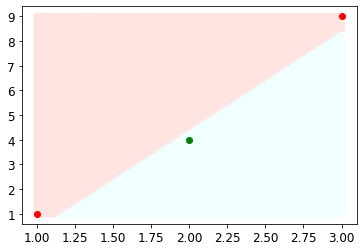

In [133]:
plt.scatter(x1_flat,x2_flat,c=colors)

plt.scatter(np.array([[3],[1]]),np.array([[9],[1]]),color="r")
plt.scatter(np.array([2]),np.array([[4]]),color="g")
plt.show()

So essentially what we did is we applied a kernel function (x^2) to the input to transform it so that seperating a hyperplane becomes easier. This can be generalised for more complicated kernels too.